In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('logit_data.csv')
data.columns
#Uncomment lines below to create random data for testing purposes 
#n = 1000
#data['gender'] = np.random.choice(['Male', 'Female'], size=n)
#data['age'] = np.random.randint(18, 65, size=n)
#data['visits'] = np.random.randint(0, 10, size=n)
#data['past_purchases'] = np.random.randint(0, 10, size=n)
#data['sold'] = np.random.randint(0, 1, size=n)
data.head()

,purchased,gender,age,visits,past_purchases
0,0,M,23,3,0
1,0,M,24,3,0
2,0,M,18,1,1
3,0,F,26,4,1
4,0,M,19,2,1


In [8]:
X = data[['gender', 'age', 'visits', 'past_purchases']] #Create dataframe for indpenedent variables
X = pd.get_dummies(X, drop_first=True)  #Convert gender variable to dummy variables
X = sm.add_constant(X)  #Add a constant term to the independent variables
y = data['purchased'] #Create dataframe for dependent variable
X.head()

,const,age,visits,past_purchases,gender_M
0,1.0,23,3,0,1
1,1.0,24,3,0,1
2,1.0,18,1,1,1
3,1.0,26,4,1,0
4,1.0,19,2,1,1


In [9]:
#Fit the model
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.536389
         Iterations 6


In [10]:
#Model results
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              purchased   No. Observations:                   50
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            4
Date:                Tue, 18 Jul 2023   Pseudo R-squ.:                  0.2253
Time:                        18:00:31   Log-Likelihood:                -26.819
converged:                       True   LL-Null:                       -34.617
Covariance Type:            nonrobust   LLR p-value:                  0.003612
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2181      1.526     -0.798      0.425      -4.209       1.772
age                0.0415      0.028      1.507      0.132      -0.012       0.095
visits            -0.1541      0.325

In [16]:
yhat_probabilities = result.predict(X) #Get probabilities for each observation
yhat_probabilities
yhat = np.round(yhat_probabilities) #Round probabilities to 0 (no) or 1 (yes)
yhat
yhat = yhat.astype(int) #Float to Int 
yhat

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    0
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    0
47    1
48    1
49    1
dtype: int64

In [6]:
#Calculate marginal effects
marginal_effects = result.get_margeff(at='mean')
print("Marginal Effects:")
print(marginal_effects.summary())
#Marginal Effect: To obtain the marginal effect of a predictor variable, you can calculate the derivative of the predicted probabilities with respect to that variable. 
#The marginal effect represents the change in the predicted probability of the positive outcome due to a one-unit change in the predictor variable.

Marginal Effects:
        Logit Marginal Effects       
Dep. Variable:              purchased
Method:                          dydx
At:                              mean
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0103      0.007      1.509      0.131      -0.003       0.024
visits            -0.0383      0.081     -0.474      0.636      -0.197       0.120
past_purchases     0.1780      0.138      1.291      0.197      -0.092       0.448
gender_M          -0.3638      0.176     -2.065      0.039      -0.709      -0.018


In [17]:
elasticities = result.get_margeff(at='mean',method='eyex')
print(elasticities.summary())
#Interpret as % change in Y from a 1% increase in X

        Logit Marginal Effects       
Dep. Variable:              purchased
Method:                          eyex
At:                              mean
               d(lny)/d(lnx)    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.6702      0.454      1.476      0.140      -0.219       1.560
visits               -0.1727      0.366     -0.472      0.637      -0.889       0.544
past_purchases        0.5137      0.402      1.278      0.201      -0.274       1.301
gender_M             -0.3768      0.191     -1.978      0.048      -0.750      -0.003


In [8]:
coefficients = result.params
odds_ratios = np.exp(coefficients)

print("Odds Ratios:")
print(odds_ratios)
#Exponentiating a logit coefficient provides the odds ratio associated with a one-unit increase in the corresponding predictor variable. 
#For example, if the exponentiated coefficient is 2, it indicates that a one-unit increase in the predictor variable is associated with a doubling of the odds of the positive outcome.

Odds Ratios:
const             0.295795
age               1.042322
visits            0.857184
past_purchases    2.047895
gender_M          0.231137
dtype: float64


In [9]:
accuracy = accuracy_score(y, yhat)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [18]:
report = classification_report(y, yhat)
print("Classification Report:")
print(report)

#Precision is the ratio of true positive predictions to the total number of positive predictions made by the model.
#Precision is concerned with the correctness of positive predictions 

#Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset.
#Recall is concerned with avoiding false negatives.

#F1-Score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. 
#The F1 score considers both false positives and false negatives and is useful when you want to find a balance between precision and recall.

#Support is the number of actual instances of each outcome in the dataset

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.79      0.73      0.76        26

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



In [19]:
#Prediction on new data
new_data = pd.DataFrame({'gender_M': ['Male', 'Female','Male'],
                         'age': [30, 40, 50],
                         'visits': [5, 8, 2],
                         'past_purchases': [2, 6, 0]})

new_data = pd.get_dummies(new_data, drop_first=True)  
new_data = sm.add_constant(new_data)  
yhat_probabilities = result.predict(new_data)
yhat = np.round(yhat_probabilities)  
yhat = yhat.astype(int)

print("Predictions:", yhat)
print("Probabilities:", yhat_probabilities)

Predictions: 0    0
1    1
2    0
dtype: int64
Probabilities: 0    0.315142
1    0.970915
2    0.285267
dtype: float64


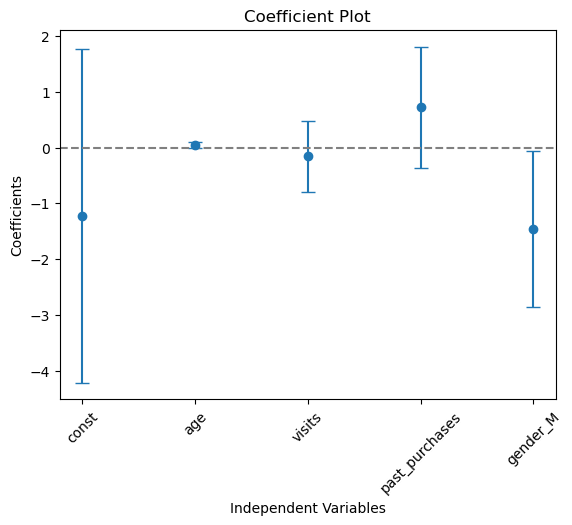

In [20]:
#Coefficient Plot
coefficients = result.params
conf_int = result.conf_int()

plt.errorbar(coefficients.index, coefficients, yerr=(coefficients - conf_int[0], conf_int[1] - coefficients), fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--')  # Add a reference line at 0
plt.xlabel('Independent Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')
plt.xticks(rotation=45)
plt.show() 

In [25]:
#Calculate column means
mean_age = X['age'].mean()
mean_visits = X['visits'].mean()
mean_past_purchases = X['past_purchases'].mean()
mean_gender = X['gender_M'].mean()
n = len(X)

#Generate span variables
age_span = np.linspace(X['age'].min(), X['age'].max(), len(X))
visits_span = np.linspace(X['visits'].min(), X['visits'].max(), len(X))
past_purchases_span = np.linspace(X['past_purchases'].min(), X['past_purchases'].max(), len(X))
gender_M_span = np.linspace(X['gender_M'].min(), X['gender_M'].max(), len(X))

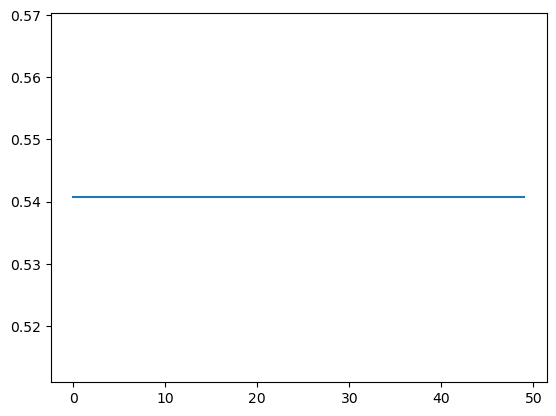

In [23]:
#Subsitute means for spans
#Here age is used as an example
df2 = pd.DataFrame({
    'const': np.full(n, 1),
    'age': np.full(n, mean_age),
    'visits': np.full(n, mean_visits),
    'past_purchases': np.full(n, mean_past_purchases),
    'gender': np.full(n, mean_gender)
})


yhat_probabilities = result.predict(df2)
yhat = np.round(yhat_probabilities)  
yhat = yhat.astype(int)

plt.plot(yhat_probabilities)

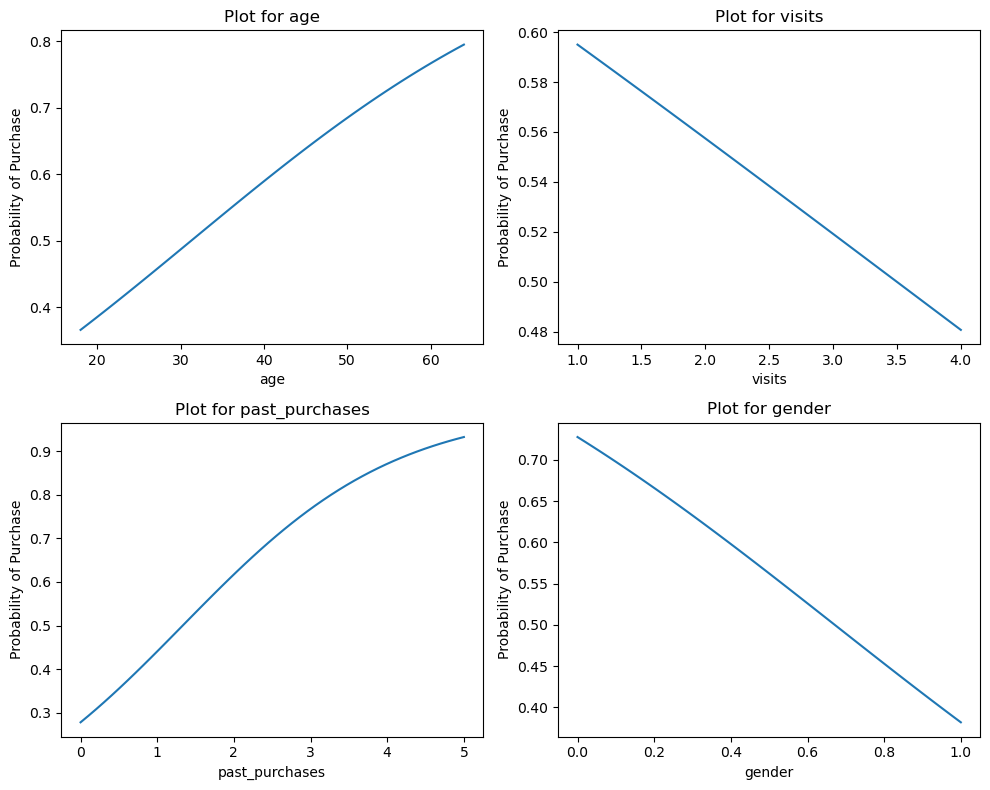

In [28]:
#Bulk probability plots

column_dict = {'age':age_span,'visits':visits_span,'past_purchases':past_purchases_span,'gender':gender_M_span}

num_rows = (len(column_dict) + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(10, 8))

#Flatten the axs array if it has multiple dimensions
if num_rows > 1:
    axs = axs.flatten()
    
for i, column in enumerate(column_dict):
    original_column = df2[column].copy()
    df2[column] = column_dict[column]
    yhat_probabilities = result.predict(df2)

    # Plot the subplot
    axs[i].plot(df2[column], yhat_probabilities)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Probability of Purchase')
    axs[i].set_title(f'Plot for {column}')

    df2[column] = original_column

plt.tight_layout() #Better spacing
plt.show()

In [29]:
params = result.params
intercept = params[0]
age_coef = params[1]
visits_coef = params[2]
past_purchases_coef = params[3]
gender_coef = params[4]

def predict_probability(age, visits, past_purchases, gender):
    if gender == "m":
        gender = 1
    elif gender == "f":
        gender = 0
    else:
        gender = gender
        
    
    # Step 1: Compute logit score
    logit_score = intercept + age_coef*age + visits_coef*visits + past_purchases_coef*past_purchases + gender_coef*gender
    
    # Step 2: Convert logit score to a probability
    probability = 1 / (1 + np.exp(-logit_score))
    
    if gender == 1:
        gender_var = "male"
    else:
        gender_var = "female"
    
    print(f'The probability that someone age {age}, who has vistied {visits} times, purchased {past_purchases} time(s) in the past, and is {gender_var}, will purchase is  {probability}')
    
    return probability

predict_probability(25,1,1,"f")
predict_probability(25,1,1,"m")



The probability that someone age 25, who has vistied 1 times, purchased 1 time(s) in the past, and is female, will purchase is  0.5940899802233435
The probability that someone age 25, who has vistied 1 times, purchased 1 time(s) in the past, and is male, will purchase is  0.2527792599704725


0.2527792599704725